# Distribution of default values
## In cleaned samples

In [2]:
import torch
#import torch.nn as nn
#from torch.utils.data import TensorDataset, ConcatDataset

In [3]:
import numpy as np

In [4]:
categories = ['b', 'bb', 'c', 'udsg']
labels = [0, 1, 2, 3]

In [5]:
default = 0.001

In [6]:
import sys
import os
import uproot4 as uproot
import numpy as np
import awkward1 as ak

import gc

import torch
import torch.nn as nn

from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import time

print("Torch version =",torch.__version__)

Torch version = 1.4.0


In [85]:
import matplotlib.pyplot as plt
import mplhep as hep

import json

plt.style.use([hep.cms.style.ROOT,hep.style.fira,hep.style.firamath])

In [8]:
from matplotlib.colors import LogNorm

In [9]:
from scipy.stats import binned_statistic_2d

In [24]:
import sys

In [79]:
import seaborn as sns

In [10]:
starts = np.arange(0,2450,50)
# this will have all ends from 49 to 2399 as well as 2446 (this was the number of original .root-files)
ends = np.concatenate((np.arange(49,2449,50), np.arange(2446,2447)))             



#print(starts)
#print(ends)
NUM_DATASETS = len(starts)
print(NUM_DATASETS)


# TT to Semileptonic
dataset_paths = [f'/hpcwork/um106329/may_21/cleaned_TT/inputs_{starts[k]}_to_{ends[k]}_with_default_{default}.npy' for k in range(0, NUM_DATASETS)]
DeepCSV_paths = [f'/hpcwork/um106329/may_21/cleaned_TT/deepcsv_{starts[k]}_to_{ends[k]}_with_default_{default}.npy' for k in range(0, NUM_DATASETS)]

49


In [11]:
qcdstarts = np.arange(0,11450,50)
# this will have all ends from 49 to 2399 as well as 2446 (this was the number of original .root-files)
qcdends = np.concatenate((np.arange(49,11449,50), np.arange(11407,11408)))             



#print(starts)
#print(ends)
qcdNUM_DATASETS = len(qcdstarts)
print(qcdNUM_DATASETS)


# QCD
qcddataset_paths = [f'/hpcwork/um106329/may_21/cleaned_QCD/inputs_{qcdstarts[k]}_to_{qcdends[k]}_with_default_{default}.npy' for k in range(0, qcdNUM_DATASETS)]
qcdDeepCSV_paths = [f'/hpcwork/um106329/may_21/cleaned_QCD/deepcsv_{qcdstarts[k]}_to_{qcdends[k]}_with_default_{default}.npy' for k in range(0, qcdNUM_DATASETS)]

229


In [81]:
display_names = ['Jet $\eta$',
                'Jet $p_T$',
                'Flight Distance 2D Sig','Flight Distance 2D Val','Flight Distance 3D Sig', 'Flight Distance 3D Val',
                'Track Decay Len Val [0]','Track Decay Len Val [1]','Track Decay Len Val [2]','Track Decay Len Val [3]','Track Decay Len Val [4]','Track Decay Len Val [5]',
                'Track $\Delta R$ [0]','Track $\Delta R$ [1]','Track $\Delta R$ [2]','Track $\Delta R$ [3]','Track $\Delta R$ [4]','Track $\Delta R$ [5]',
                'Track $\eta_{rel}$ [0]','Track $\eta_{rel}$ [1]','Track $\eta_{rel}$ [2]','Track $\eta_{rel}$ [3]',
                'Track Jet Dist Val [0]','Track Jet Dist Val [1]','Track Jet Dist Val [2]','Track Jet Dist Val [3]','Track Jet Dist Val [4]','Track Jet Dist Val [5]',
                'Track Jet $p_T$',
                'Track $p_T$ Ratio [0]','Track $p_T$ Ratio [1]','Track $p_T$ Ratio [2]','Track $p_T$ Ratio [3]','Track $p_T$ Ratio [4]','Track $p_T$ Ratio [5]',
                'Track $p_{T,rel}$ [0]','Track $p_{T,rel}$ [1]','Track $p_{T,rel}$ [2]','Track $p_{T,rel}$ [3]','Track $p_{T,rel}$ [4]','Track $p_{T,rel}$ [5]',
                'Track SIP 2D Sig Above Charm',
                'Track SIP 2D Sig [0]','Track SIP 2D Sig [1]','Track SIP 2D Sig [2]','Track SIP 2D Sig [3]','Track SIP 2D Sig [4]','Track SIP 2D Sig [5]',
                'Track SIP 2D Val Above Charm',
                'Track SIP 3D Sig Above Charm',
                'Track SIP 3D Sig [0]','Track SIP 3D Sig [1]','Track SIP 3D Sig [2]','Track SIP 3D Sig [3]','Track SIP 3D Sig [4]','Track SIP 3D Sig [5]',
                'Track SIP 3D Val Above Charm',
                'Track Sum Jet $\Delta R$','Track Sum Jet $E_T$ Ratio',
                'Vertex Category','Vertex Energy Ratio','Vertex Jet $\Delta R$','Vertex Mass',
                'Jet N Secondary Vertices','Jet N Selected Tracks','Jet N Tracks $\eta_{rel}$','Vertex N Tracks']

In [14]:
default = 0.001
minima = np.load('/home/um106329/aisafety/april_21/from_Nik/default_value_studies_minima.npy')
defaults = minima - default

In [34]:
default_counter = np.zeros((4,67))
all_counter = np.zeros(4)
# TT
for p in dataset_paths:
    data = np.load(p)
    for category_i in range(4):
        this_category = data[data[:,-1] == category_i]
        all_counter[category_i] += len(this_category)
        #print(all_counter)
        for k in range(67):
            #print(default_counter[category_i,k])
            #print(this_category[:,k]==defaults[k])
            default_counter[category_i,k] += np.sum(this_category[:,k]==defaults[k])
for p in qcddataset_paths:
    data = np.load(p)
    for category_i in range(4):
        this_category = data[data[:,-1] == category_i]
        all_counter[category_i] += len(this_category)
        #print(all_counter)
        for k in range(67):
            #print(default_counter[category_i,k])
            #print(this_category[:,k]==defaults[k])
            default_counter[category_i,k] += np.sum(this_category[:,k]==defaults[k])

In [36]:
np.save('default_counter.npy',default_counter)

In [37]:
np.save('all_counter.npy',all_counter)

In [38]:
default_counter

array([[0.00000000e+00, 0.00000000e+00, 2.07405790e+07, 2.07405790e+07,
        2.07405790e+07, 2.07405790e+07, 8.88554000e+05, 5.75805200e+06,
        1.70816710e+07, 3.33282850e+07, 5.06796730e+07, 6.52155210e+07,
        8.88554000e+05, 5.75805200e+06, 1.70816710e+07, 3.33282850e+07,
        5.06796730e+07, 6.52155210e+07, 1.61777160e+07, 1.61777160e+07,
        3.40216400e+07, 5.15991710e+07, 8.88554000e+05, 5.75805200e+06,
        1.70816710e+07, 3.33282850e+07, 5.06796730e+07, 6.52155210e+07,
        3.87546000e+05, 8.88554000e+05, 5.75805200e+06, 1.70816710e+07,
        3.33282850e+07, 5.06796730e+07, 6.52155210e+07, 8.88554000e+05,
        5.75805200e+06, 1.70816710e+07, 3.33282850e+07, 5.06796730e+07,
        6.52155210e+07, 1.19569970e+07, 8.88554000e+05, 5.75805200e+06,
        1.70816710e+07, 3.33282850e+07, 5.06796730e+07, 6.52155210e+07,
        1.19542830e+07, 1.19573660e+07, 8.88554000e+05, 5.75805200e+06,
        1.70816710e+07, 3.33282850e+07, 5.06796730e+07, 6.521552

In [39]:
all_counter

array([9.0508914e+07, 6.7355240e+06, 7.5777358e+07, 7.6090095e+08])

In [46]:
percentages = np.array([default_counter[i] / all_counter[i] for i in range(4)])

In [48]:
percentages*100

array([[0.00000000e+00, 0.00000000e+00, 2.29155097e+01, 2.29155097e+01,
        2.29155097e+01, 2.29155097e+01, 9.81730927e-01, 6.36186177e+00,
        1.88729157e+01, 3.68232073e+01, 5.59941234e+01, 7.20542520e+01,
        9.81730927e-01, 6.36186177e+00, 1.88729157e+01, 3.68232073e+01,
        5.59941234e+01, 7.20542520e+01, 1.78741687e+01, 1.78741687e+01,
        3.75892699e+01, 5.70100432e+01, 9.81730927e-01, 6.36186177e+00,
        1.88729157e+01, 3.68232073e+01, 5.59941234e+01, 7.20542520e+01,
        4.28185449e-01, 9.81730927e-01, 6.36186177e+00, 1.88729157e+01,
        3.68232073e+01, 5.59941234e+01, 7.20542520e+01, 9.81730927e-01,
        6.36186177e+00, 1.88729157e+01, 3.68232073e+01, 5.59941234e+01,
        7.20542520e+01, 1.32108501e+01, 9.81730927e-01, 6.36186177e+00,
        1.88729157e+01, 3.68232073e+01, 5.59941234e+01, 7.20542520e+01,
        1.32078515e+01, 1.32112578e+01, 9.81730927e-01, 6.36186177e+00,
        1.88729157e+01, 3.68232073e+01, 5.59941234e+01, 7.205425

In [53]:
int(all_jets) = sum(all_counter)
all_default = np.sum(default_counter, axis=0)

In [54]:
all_default

array([0.00000000e+00, 0.00000000e+00, 6.43993133e+08, 6.43993133e+08,
       6.43993133e+08, 6.43993133e+08, 1.81153340e+07, 9.11973840e+07,
       1.96289327e+08, 3.30926071e+08, 4.69155167e+08, 5.90215453e+08,
       1.81153340e+07, 9.11973840e+07, 1.96289327e+08, 3.30926071e+08,
       4.69155167e+08, 5.90215453e+08, 6.18810681e+08, 6.18810681e+08,
       7.33372106e+08, 8.01571833e+08, 1.81153340e+07, 9.11973840e+07,
       1.96289327e+08, 3.30926071e+08, 4.69155167e+08, 5.90215453e+08,
       1.26041040e+07, 1.81153340e+07, 9.11973840e+07, 1.96289327e+08,
       3.30926071e+08, 4.69155167e+08, 5.90215453e+08, 1.81153340e+07,
       9.11973840e+07, 1.96289327e+08, 3.30926071e+08, 4.69155167e+08,
       5.90215453e+08, 1.50065054e+08, 1.81153340e+07, 9.11973840e+07,
       1.96289327e+08, 3.30926071e+08, 4.69155167e+08, 5.90215453e+08,
       1.50022466e+08, 1.50089883e+08, 1.81153340e+07, 9.11973840e+07,
       1.96289327e+08, 3.30926071e+08, 4.69155167e+08, 5.90215453e+08,
      

In [55]:
all_percentages = all_default / all_jets
all_percentages

array([0.        , 0.        , 0.68955718, 0.68955718, 0.68955718,
       0.68955718, 0.01939704, 0.09764982, 0.21017726, 0.35433988,
       0.50234901, 0.6319746 , 0.01939704, 0.09764982, 0.21017726,
       0.35433988, 0.50234901, 0.6319746 , 0.66259301, 0.66259301,
       0.78525993, 0.85828495, 0.01939704, 0.09764982, 0.21017726,
       0.35433988, 0.50234901, 0.6319746 , 0.01349587, 0.01939704,
       0.09764982, 0.21017726, 0.35433988, 0.50234901, 0.6319746 ,
       0.01939704, 0.09764982, 0.21017726, 0.35433988, 0.50234901,
       0.6319746 , 0.16068251, 0.01939704, 0.09764982, 0.21017726,
       0.35433988, 0.50234901, 0.6319746 , 0.16063691, 0.1607091 ,
       0.01939704, 0.09764982, 0.21017726, 0.35433988, 0.50234901,
       0.6319746 , 0.16063707, 0.01349587, 0.01349587, 0.01349587,
       0.66273397, 0.66273397, 0.66273397, 0.        , 0.        ,
       0.        , 0.        ])

<ipython-input-71-b6dd3ef83865>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jet $\eta$',


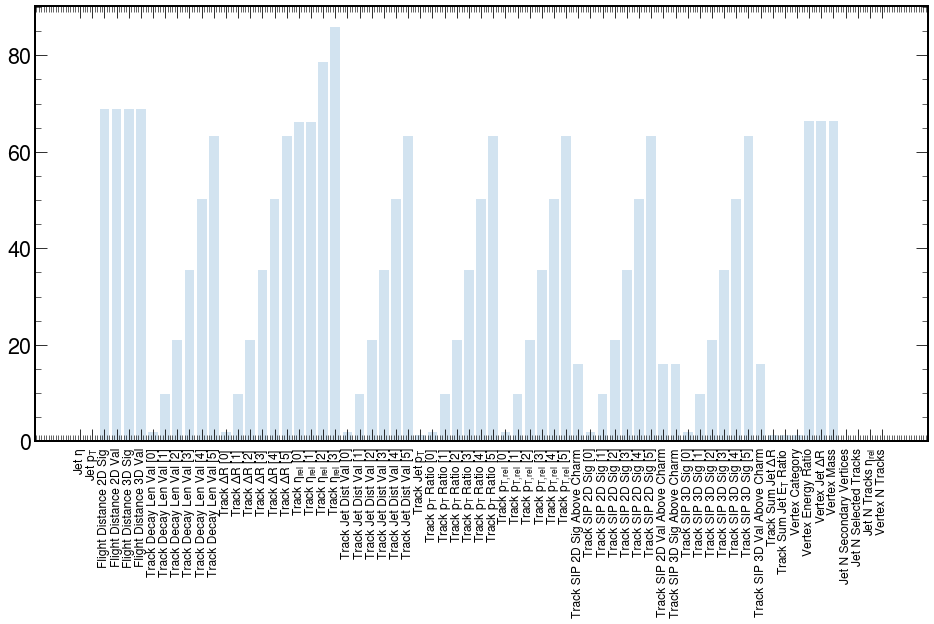

In [71]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(np.arange(67),all_percentages*100,alpha=0.2)
ax.set_xticklabels(['Jet $\eta$',
                'Jet $p_T$',
                'Flight Distance 2D Sig','Flight Distance 2D Val','Flight Distance 3D Sig', 'Flight Distance 3D Val',
                'Track Decay Len Val [0]','Track Decay Len Val [1]','Track Decay Len Val [2]','Track Decay Len Val [3]','Track Decay Len Val [4]','Track Decay Len Val [5]',
                'Track $\Delta R$ [0]','Track $\Delta R$ [1]','Track $\Delta R$ [2]','Track $\Delta R$ [3]','Track $\Delta R$ [4]','Track $\Delta R$ [5]',
                'Track $\eta_{rel}$ [0]','Track $\eta_{rel}$ [1]','Track $\eta_{rel}$ [2]','Track $\eta_{rel}$ [3]',
                'Track Jet Dist Val [0]','Track Jet Dist Val [1]','Track Jet Dist Val [2]','Track Jet Dist Val [3]','Track Jet Dist Val [4]','Track Jet Dist Val [5]',
                'Track Jet $p_T$',
                'Track $p_T$ Ratio [0]','Track $p_T$ Ratio [1]','Track $p_T$ Ratio [2]','Track $p_T$ Ratio [3]','Track $p_T$ Ratio [4]','Track $p_T$ Ratio [5]',
                'Track $p_{T,rel}$ [0]','Track $p_{T,rel}$ [1]','Track $p_{T,rel}$ [2]','Track $p_{T,rel}$ [3]','Track $p_{T,rel}$ [4]','Track $p_{T,rel}$ [5]',
                'Track SIP 2D Sig Above Charm',
                'Track SIP 2D Sig [0]','Track SIP 2D Sig [1]','Track SIP 2D Sig [2]','Track SIP 2D Sig [3]','Track SIP 2D Sig [4]','Track SIP 2D Sig [5]',
                'Track SIP 2D Val Above Charm',
                'Track SIP 3D Sig Above Charm',
                'Track SIP 3D Sig [0]','Track SIP 3D Sig [1]','Track SIP 3D Sig [2]','Track SIP 3D Sig [3]','Track SIP 3D Sig [4]','Track SIP 3D Sig [5]',
                'Track SIP 3D Val Above Charm',
                'Track Sum Jet $\Delta R$','Track Sum Jet $E_T$ Ratio',
                'Vertex Category','Vertex Energy Ratio','Vertex Jet $\Delta R$','Vertex Mass',
                'Jet N Secondary Vertices','Jet N Selected Tracks','Jet N Tracks $\eta_{rel}$','Vertex N Tracks'],rotation=90, fontsize=12)
ax.set_xticks(np.arange(67))

<ipython-input-73-effd477d5211>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jet $\eta$',


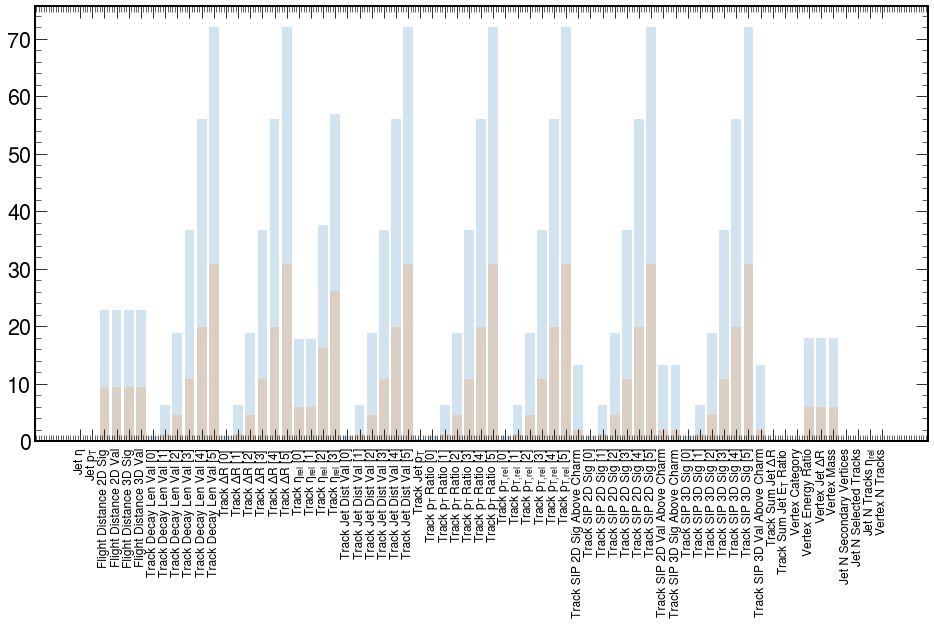

In [73]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(np.arange(67),percentages[0]*100,alpha=0.2)
plt.bar(np.arange(67),percentages[1]*100,alpha=0.2)
ax.set_xticklabels(['Jet $\eta$',
                'Jet $p_T$',
                'Flight Distance 2D Sig','Flight Distance 2D Val','Flight Distance 3D Sig', 'Flight Distance 3D Val',
                'Track Decay Len Val [0]','Track Decay Len Val [1]','Track Decay Len Val [2]','Track Decay Len Val [3]','Track Decay Len Val [4]','Track Decay Len Val [5]',
                'Track $\Delta R$ [0]','Track $\Delta R$ [1]','Track $\Delta R$ [2]','Track $\Delta R$ [3]','Track $\Delta R$ [4]','Track $\Delta R$ [5]',
                'Track $\eta_{rel}$ [0]','Track $\eta_{rel}$ [1]','Track $\eta_{rel}$ [2]','Track $\eta_{rel}$ [3]',
                'Track Jet Dist Val [0]','Track Jet Dist Val [1]','Track Jet Dist Val [2]','Track Jet Dist Val [3]','Track Jet Dist Val [4]','Track Jet Dist Val [5]',
                'Track Jet $p_T$',
                'Track $p_T$ Ratio [0]','Track $p_T$ Ratio [1]','Track $p_T$ Ratio [2]','Track $p_T$ Ratio [3]','Track $p_T$ Ratio [4]','Track $p_T$ Ratio [5]',
                'Track $p_{T,rel}$ [0]','Track $p_{T,rel}$ [1]','Track $p_{T,rel}$ [2]','Track $p_{T,rel}$ [3]','Track $p_{T,rel}$ [4]','Track $p_{T,rel}$ [5]',
                'Track SIP 2D Sig Above Charm',
                'Track SIP 2D Sig [0]','Track SIP 2D Sig [1]','Track SIP 2D Sig [2]','Track SIP 2D Sig [3]','Track SIP 2D Sig [4]','Track SIP 2D Sig [5]',
                'Track SIP 2D Val Above Charm',
                'Track SIP 3D Sig Above Charm',
                'Track SIP 3D Sig [0]','Track SIP 3D Sig [1]','Track SIP 3D Sig [2]','Track SIP 3D Sig [3]','Track SIP 3D Sig [4]','Track SIP 3D Sig [5]',
                'Track SIP 3D Val Above Charm',
                'Track Sum Jet $\Delta R$','Track Sum Jet $E_T$ Ratio',
                'Vertex Category','Vertex Energy Ratio','Vertex Jet $\Delta R$','Vertex Mass',
                'Jet N Secondary Vertices','Jet N Selected Tracks','Jet N Tracks $\eta_{rel}$','Vertex N Tracks'],rotation=90, fontsize=12)
ax.set_xticks(np.arange(67))

<ipython-input-72-74b6ca7c83ff>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jet $\eta$',


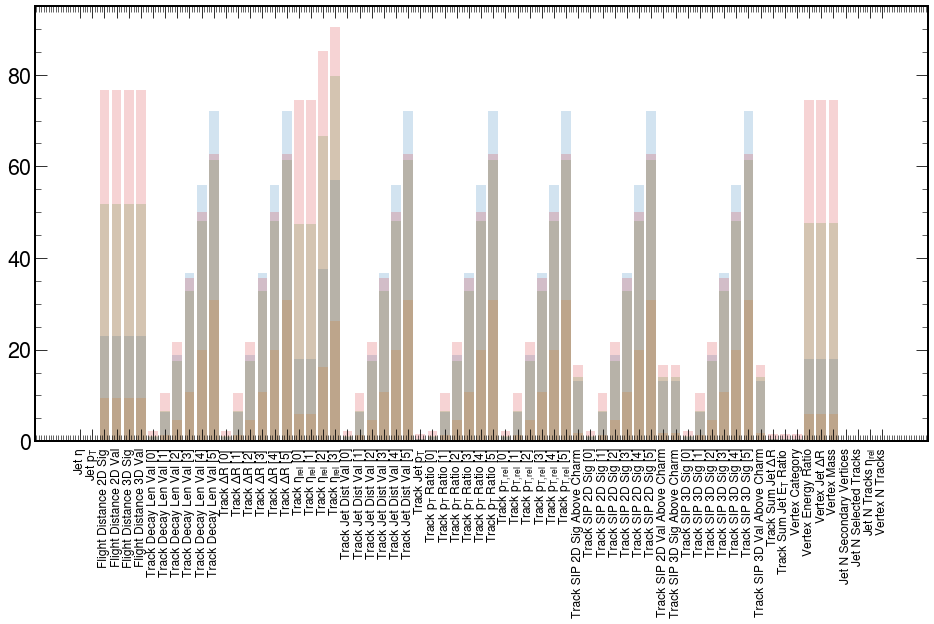

In [72]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(np.arange(67),percentages[0]*100,alpha=0.2)
plt.bar(np.arange(67),percentages[1]*100,alpha=0.2)
plt.bar(np.arange(67),percentages[2]*100,alpha=0.2)
plt.bar(np.arange(67),percentages[3]*100,alpha=0.2)
ax.set_xticklabels(display_names,rotation=90, fontsize=12)
ax.set_xticks(np.arange(67))

In [77]:
percentages_new = np.vstack((percentages, all_percentages))
percentages_new

array([[0.00000000e+00, 0.00000000e+00, 2.29155097e-01, 2.29155097e-01,
        2.29155097e-01, 2.29155097e-01, 9.81730927e-03, 6.36186177e-02,
        1.88729157e-01, 3.68232073e-01, 5.59941234e-01, 7.20542520e-01,
        9.81730927e-03, 6.36186177e-02, 1.88729157e-01, 3.68232073e-01,
        5.59941234e-01, 7.20542520e-01, 1.78741687e-01, 1.78741687e-01,
        3.75892699e-01, 5.70100432e-01, 9.81730927e-03, 6.36186177e-02,
        1.88729157e-01, 3.68232073e-01, 5.59941234e-01, 7.20542520e-01,
        4.28185449e-03, 9.81730927e-03, 6.36186177e-02, 1.88729157e-01,
        3.68232073e-01, 5.59941234e-01, 7.20542520e-01, 9.81730927e-03,
        6.36186177e-02, 1.88729157e-01, 3.68232073e-01, 5.59941234e-01,
        7.20542520e-01, 1.32108501e-01, 9.81730927e-03, 6.36186177e-02,
        1.88729157e-01, 3.68232073e-01, 5.59941234e-01, 7.20542520e-01,
        1.32078515e-01, 1.32112578e-01, 9.81730927e-03, 6.36186177e-02,
        1.88729157e-01, 3.68232073e-01, 5.59941234e-01, 7.205425

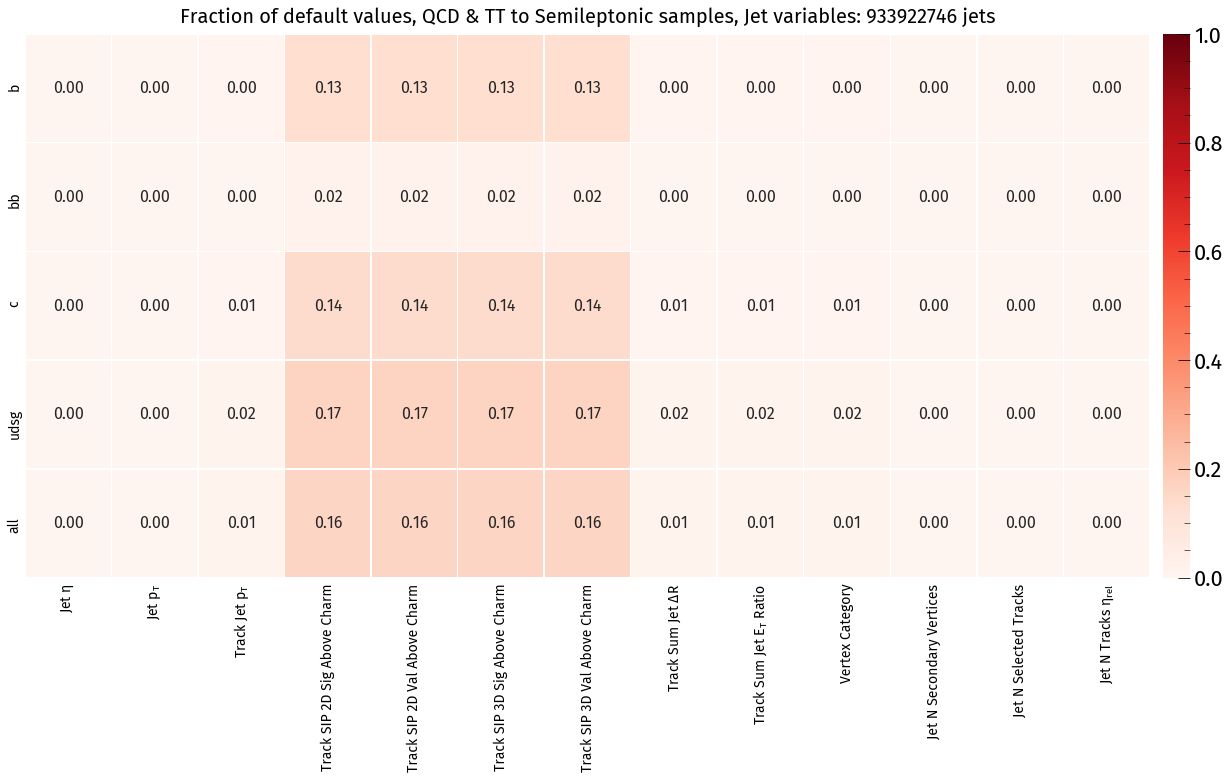

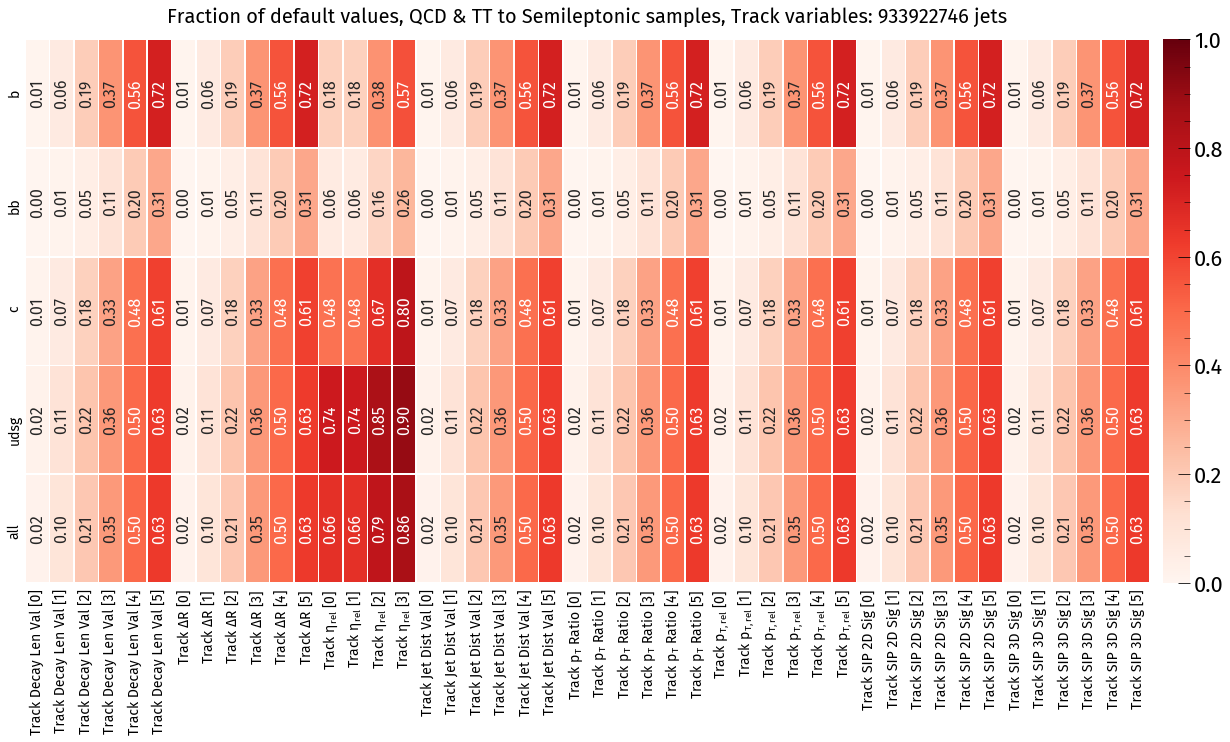

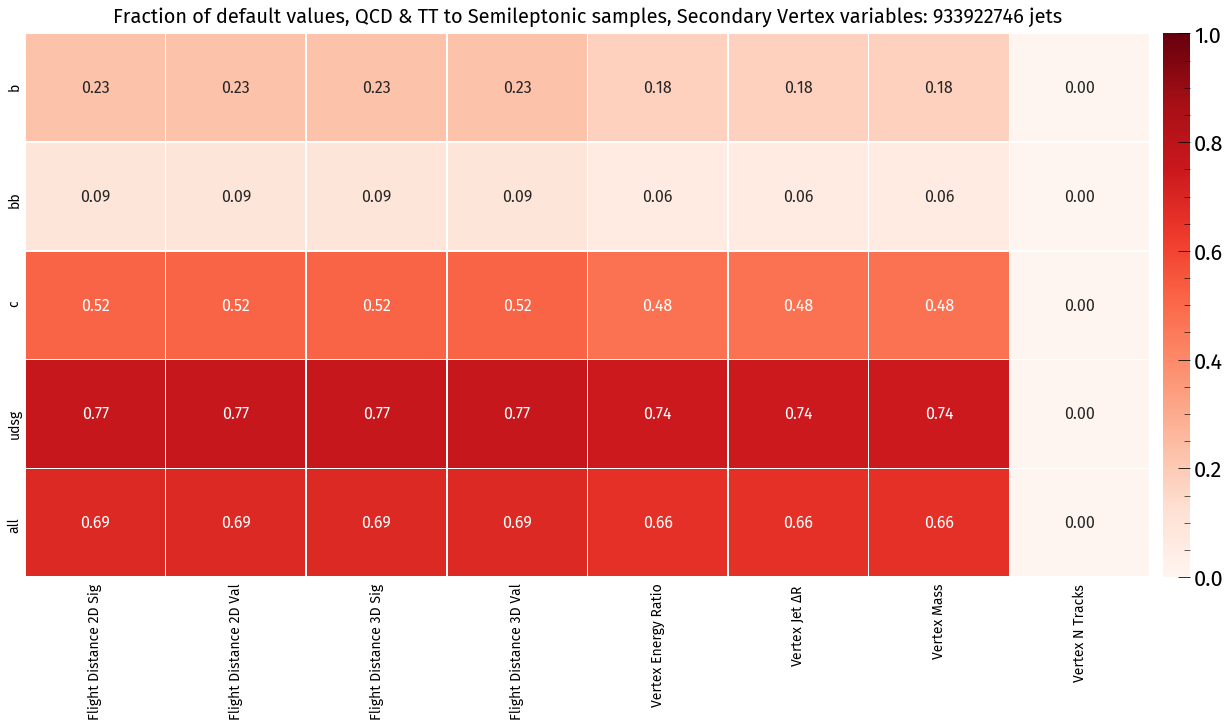

35468

In [114]:
jetINDEX = [0,1,28,41,48,49,56,57,58,59,63,64,65] 
trackINDEX = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,50,51,52,53,54,55,]
svINDEX = [2,3,4,5,60,61,62,66]
NUM_DATASETS = 278

fig, ax = plt.subplots(figsize=(24, 10))
#hep.cms.label(loc=0)

hm = sns.heatmap(percentages_new[:,jetINDEX], cbar=True, vmin=0, vmax=1,
                 fmt='.2f', annot_kws={'size': 16, 'rotation': 0}, annot=True, 
                 square=False, cmap=plt.cm.Reds, cbar_kws=dict(pad=0.01),edgecolors='k',linewidth=0.5)
#cbar_ax = fig.axes[-1]
#cbar_solids = cbar_ax.collections[0]
#cbar_solids.set_edgecolor("face")
#notcbar_ax = fig.axes[0]
#notcbar_solids = cbar_ax.collections[0]
#notcbar_solids.set_edgecolor("face")
ticksX = np.arange(len(jetINDEX)) + 0.5
ticksY = np.arange(5) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[jetINDEX], rotation=90, fontsize=14)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['b', 'bb', 'c', 'udsg', 'all'], rotation=90, fontsize=14)
ax.yaxis.set_ticks_position('none') 

if NUM_DATASETS == 1:
    ax.set_title(f'Fraction of default values, QCD & TT to Semileptonic samples\nJet variables: 1 file, {int(all_jets)} jets', size=16, y=1.02)
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_Jet.svg', bbox_inches='tight')
else:
    ax.set_title(f'Fraction of default values, QCD & TT to Semileptonic samples, Jet variables: {int(all_jets)} jets', size=20, y=1.01)
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_{int(all_jets)}_jets_default_{default}_Jet.svg', bbox_inches='tight')
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_{int(all_jets)}_jets_default_{default}_Jet.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)


fig, ax = plt.subplots(figsize=(24, 10))
#hep.cms.label(loc=0)

hm = sns.heatmap(percentages_new[:,trackINDEX], cbar=True, vmin=0, vmax=1,
                 fmt='.2f', annot_kws={'size': 16, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.Reds, cbar_kws=dict(pad=0.01),edgecolors='k',linewidth=0.5)

ticksX = np.arange(len(trackINDEX)) + 0.5
ticksY = np.arange(5) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[trackINDEX], rotation=90, fontsize=14)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['b', 'bb', 'c', 'udsg', 'all'], rotation=90, fontsize=14)
ax.yaxis.set_ticks_position('none') 

if NUM_DATASETS == 1:
    ax.set_title(f'Fraction of default values, QCD & TT to Semileptonic samples\nTrack variables: 1 file, {int(all_jets)} jets', size=16, y=1.01)
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_Track.svg', bbox_inches='tight')
else:
    ax.set_title(f'Fraction of default values, QCD & TT to Semileptonic samples, Track variables: {int(all_jets)} jets', size=20, y=1.02)
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_{int(all_jets)}_jets_default_{default}_Track.svg', bbox_inches='tight')
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_{int(all_jets)}_jets_default_{default}_Track.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)


fig, ax = plt.subplots(figsize=(24, 10))
#hep.cms.label(loc=0)

hm = sns.heatmap(percentages_new[:,svINDEX], cbar=True, vmin=0, vmax=1,
                 fmt='.2f', annot_kws={'size': 16, 'rotation': 0}, annot=True, 
                 square=False, cmap=plt.cm.Reds, cbar_kws=dict(pad=0.01),edgecolors='k',linewidth=0.5)

ticksX = np.arange(len(svINDEX)) + 0.5
ticksY = np.arange(5) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[svINDEX], rotation=90, fontsize=14)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['b', 'bb', 'c', 'udsg', 'all'], rotation=90, fontsize=14)
ax.yaxis.set_ticks_position('none') 

if NUM_DATASETS == 1:
    ax.set_title(f'Fraction of default values, QCD & TT to Semileptonic samples\nSecondary Vertex variables: 1 file, {int(all_jets)} jets', size=16, y=1.02)
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_SV.svg', bbox_inches='tight')
else:
    ax.set_title(f'Fraction of default values, QCD & TT to Semileptonic samples, Secondary Vertex variables: {int(all_jets)} jets', size=20, y=1.01)
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_{int(all_jets)}_jets_default_{default}_SV.svg', bbox_inches='tight')
    plt.savefig(f'/home/um106329/aisafety/june_21/preparations/defaults_percentage_{int(all_jets)}_jets_default_{default}_SV.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)
